# Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import re
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file into a dataframe
df = pd.read_csv("Mitsubishi_Vehicle_Details.csv")

df.head()

,New/Used,Model,Primary Price,Secondary Price Drop,Vehicle Badge,EMI,Dealer Name,Rating,Reviews
0,Used,2020 Mitsubishi Outlander,"$19,995",NaN,\n\n\n\n\nGreat Deal\n\n\nHome Delivery\n\n\nV...,NaN,\nDOUGLASS NISSAN OF WACO\n,4.9,(276 reviews)
1,New,2022 Mitsubishi Outlander SE,"$33,769",$776 price drop,\n\nHome Delivery\n\n\nVirtual Appointments\n\n,NaN,\nAmato Hyundai Mitsubishi\n,4.4,(517 reviews)
2,New,2022 Mitsubishi Outlander SEL Special Edition,"$36,530",NaN,NaN,NaN,\nPorcaro Mitsubishi\n,5.0,(12 reviews)
3,Used,2022 Mitsubishi Outlander SEL,"$31,980",$860 price drop,\n\n\n\n\nGood Deal\n\n,NaN,\nEl Cajon Mitsubishi\n,4.4,(870 reviews)
4,Used,2016 Mitsubishi Outlander SEL,"$19,990",NaN,\n\n\n\n\nGood Deal\n\n\nHome Delivery\n\n\nVi...,NaN,\nCarvana-Touchless Delivery To Your Home\n,4.1,"(9,471 reviews)"


In [3]:
# Primary Price
df['Primary Price'] = df['Primary Price'].apply(lambda x: x.replace('$','').replace(',',''))
# Use Regex to remove $ sign and comma ,
df['Primary Price'][df['Primary Price'] == 'Not Priced'] = np.NaN
# Change 'Not Priced' into NaN
df['Primary Price'] = df['Primary Price'].astype(float)
# Convert to float

# year
regex = r'[0-9]{4}'
df['Year'] = df['Model'].apply(lambda x : re.findall(regex, str(x)))
# Use Regex to find year
df['Year'][df['Year'].str.len()==0] = np.NaN
# if no year then make them NaN
df['Year'] = df['Year'].apply(lambda x : ''.join(x))
# to convert them from list item to string
df['Year'] = df['Year'].astype(int)

# Badge

regex = r'(?:Home Delivery|Virtual Appointments|Good Deal|Great Deal)'
# regex for Badges
df['Vehicle Badge'] = df['Vehicle Badge'].apply(lambda x : re.findall(regex,str(x)))
# To find badges
df['Vehicle Badge'] = df['Vehicle Badge'].apply(lambda x : ','.join(x))
df['Vehicle Badge'][df['Vehicle Badge'].str.len()==0] = np.NaN


# Dealer

regex = r'[^\n][a-zA-Z\s-]+[^\n]'
df['Dealer Name'] = df['Dealer Name'].apply(lambda x: re.findall(regex,str(x)))
df['Dealer Name'] = df['Dealer Name'].apply(lambda x : ''.join(x))
df['Dealer Name'][df['Dealer Name'].str.len()==0] = np.NaN

# Price Drop

regex = r'[0-9]+'

df['Secondary Price Drop'] = df['Secondary Price Drop'].apply(lambda x : re.findall(regex, str(x)))
df['Secondary Price Drop'] = df['Secondary Price Drop'].apply(lambda x : ''.join(x))
df['Secondary Price Drop'][df['Secondary Price Drop'].str.len()==0] = 0
df['Secondary Price Drop'] = df['Secondary Price Drop'].astype(float)

# Reviews

regex = r'[0-9,]+'

df['Reviews'] = df['Reviews'].apply(lambda x : re.findall(regex,str(x)))
df['Reviews'] = df['Reviews'].apply(lambda x : ''.join(x))
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace(',',''))
df['Reviews'][df['Reviews'].str.len()==0] = 0
df['Reviews'] = df['Reviews'].astype(float)

In [4]:
# Secondary Price = Primary Price + Secondary Price Drop
df['Secondary Price'] = df['Primary Price'] + df['Secondary Price Drop']
df.head()

,New/Used,Model,Primary Price,Secondary Price Drop,Vehicle Badge,EMI,Dealer Name,Rating,Reviews,Year,Secondary Price
0,Used,2020 Mitsubishi Outlander,19995.0,0.0,"Great Deal,Home Delivery,Virtual Appointments",NaN,DOUGLASS NISSAN OF WACO,4.9,276.0,2020,19995.0
1,New,2022 Mitsubishi Outlander SE,33769.0,776.0,"Home Delivery,Virtual Appointments",NaN,Amato Hyundai Mitsubishi,4.4,517.0,2022,34545.0
2,New,2022 Mitsubishi Outlander SEL Special Edition,36530.0,0.0,NaN,NaN,Porcaro Mitsubishi,5.0,12.0,2022,36530.0
3,Used,2022 Mitsubishi Outlander SEL,31980.0,860.0,Good Deal,NaN,El Cajon Mitsubishi,4.4,870.0,2022,32840.0
4,Used,2016 Mitsubishi Outlander SEL,19990.0,0.0,"Good Deal,Home Delivery,Virtual Appointments",NaN,Carvana-Touchless Delivery To Your Home,4.1,9471.0,2016,19990.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   New/Used              801 non-null    object 
 1   Model                 801 non-null    object 
 2   Primary Price         796 non-null    float64
 3   Secondary Price Drop  801 non-null    float64
 4   Vehicle Badge         664 non-null    object 
 5   EMI                   0 non-null      float64
 6   Dealer Name           801 non-null    object 
 7   Rating                626 non-null    float64
 8   Reviews               801 non-null    float64
 9   Year                  801 non-null    int64  
 10  Secondary Price       796 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 69.0+ KB


In [6]:
df.isnull().sum()

New/Used                  0
Model                     0
Primary Price             5
Secondary Price Drop      0
Vehicle Badge           137
EMI                     801
Dealer Name               0
Rating                  175
Reviews                   0
Year                      0
Secondary Price           5
dtype: int64

In [7]:
# find the column with atleast one missing value
# axis=0 for the column
# isnull().any(axis=0)

df.isnull().any(axis=0)

New/Used                False
Model                   False
Primary Price            True
Secondary Price Drop    False
Vehicle Badge            True
EMI                      True
Dealer Name             False
Rating                   True
Reviews                 False
Year                    False
Secondary Price          True
dtype: bool

In [8]:
# Colums with all missing values  .all(axis=0)

df.isnull().all(axis=0)

New/Used                False
Model                   False
Primary Price           False
Secondary Price Drop    False
Vehicle Badge           False
EMI                      True
Dealer Name             False
Rating                  False
Reviews                 False
Year                    False
Secondary Price         False
dtype: bool

In [9]:
# Rows with atleast one missing values .any(axis=1)
df.isnull().any(axis=1)

0      True
1      True
2      True
3      True
4      True
       ... 
796    True
797    True
798    True
799    True
800    True
Length: 801, dtype: bool

In [10]:
# Rows with all missing values .all(axis=1)
df.isnull().all(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
796    False
797    False
798    False
799    False
800    False
Length: 801, dtype: bool

## Missing values Treatmen in Columns

In [11]:
# divide the sum of null values by the len of df.index
# i.e (total null values/total rows)*100 gives percent
round((df.isnull().sum()/len(df.index))*100,2)

New/Used                  0.00
Model                     0.00
Primary Price             0.62
Secondary Price Drop      0.00
Vehicle Badge            17.10
EMI                     100.00
Dealer Name               0.00
Rating                   21.85
Reviews                   0.00
Year                      0.00
Secondary Price           0.62
dtype: float64

In [12]:
# removing the EMI column
# df.dropna(axis=1,how = 'all'/'any',inplace = bool)

df.dropna(axis=1,how = 'all', inplace = True)
# axis = 1 to drop those null value column or column-wise
# how = 'all' drops the column having only null values
# how = 'any' drops all columns with atleast one null value
# inplace = True means its going to change the original
# dataframe by dropping those columns
df.head()

,New/Used,Model,Primary Price,Secondary Price Drop,Vehicle Badge,Dealer Name,Rating,Reviews,Year,Secondary Price
0,Used,2020 Mitsubishi Outlander,19995.0,0.0,"Great Deal,Home Delivery,Virtual Appointments",DOUGLASS NISSAN OF WACO,4.9,276.0,2020,19995.0
1,New,2022 Mitsubishi Outlander SE,33769.0,776.0,"Home Delivery,Virtual Appointments",Amato Hyundai Mitsubishi,4.4,517.0,2022,34545.0
2,New,2022 Mitsubishi Outlander SEL Special Edition,36530.0,0.0,NaN,Porcaro Mitsubishi,5.0,12.0,2022,36530.0
3,Used,2022 Mitsubishi Outlander SEL,31980.0,860.0,Good Deal,El Cajon Mitsubishi,4.4,870.0,2022,32840.0
4,Used,2016 Mitsubishi Outlander SEL,19990.0,0.0,"Good Deal,Home Delivery,Virtual Appointments",Carvana-Touchless Delivery To Your Home,4.1,9471.0,2016,19990.0


## Missing values Treatment in Rows

In [13]:
# filter out rows which have 4 or more than 4 missing values
# in sum(axis=1)
df[df.isna().sum(axis=1) >= 4]

,New/Used,Model,Primary Price,Secondary Price Drop,Vehicle Badge,Dealer Name,Rating,Reviews,Year,Secondary Price


In [14]:
# retaining the rows having <= 4 NaNs
# df[df.isna().sum(axis=1) <= 4]
df = df[df.isna().sum(axis=1) < 4]

In [15]:
# head
df.head()

,New/Used,Model,Primary Price,Secondary Price Drop,Vehicle Badge,Dealer Name,Rating,Reviews,Year,Secondary Price
0,Used,2020 Mitsubishi Outlander,19995.0,0.0,"Great Deal,Home Delivery,Virtual Appointments",DOUGLASS NISSAN OF WACO,4.9,276.0,2020,19995.0
1,New,2022 Mitsubishi Outlander SE,33769.0,776.0,"Home Delivery,Virtual Appointments",Amato Hyundai Mitsubishi,4.4,517.0,2022,34545.0
2,New,2022 Mitsubishi Outlander SEL Special Edition,36530.0,0.0,NaN,Porcaro Mitsubishi,5.0,12.0,2022,36530.0
3,Used,2022 Mitsubishi Outlander SEL,31980.0,860.0,Good Deal,El Cajon Mitsubishi,4.4,870.0,2022,32840.0
4,Used,2016 Mitsubishi Outlander SEL,19990.0,0.0,"Good Deal,Home Delivery,Virtual Appointments",Carvana-Touchless Delivery To Your Home,4.1,9471.0,2016,19990.0


In [16]:
# divide the sum of null values by the len of df.index
# i.e (total null values/total rows)*100 gives percent
round((df.isnull().sum()/len(df.index))*100,2)

New/Used                 0.00
Model                    0.00
Primary Price            0.62
Secondary Price Drop     0.00
Vehicle Badge           17.10
Dealer Name              0.00
Rating                  21.85
Reviews                  0.00
Year                     0.00
Secondary Price          0.62
dtype: float64

In [17]:
df.describe()

,Primary Price,Secondary Price Drop,Rating,Reviews,Year,Secondary Price
count,796.000000,801.00000,626.000000,801.000000,801.000000,796.000000
mean,28186.312814,398.54432,4.373323,796.459426,2020.705368,28587.360553
std,8125.177590,744.72970,0.620431,1721.715972,2.403764,8061.785834
min,4999.000000,0.00000,1.600000,0.000000,2004.000000,5400.000000
25%,20899.750000,0.00000,4.025000,28.000000,2020.000000,21471.750000
50%,29963.000000,0.00000,4.600000,258.000000,2022.000000,30460.000000
75%,34991.250000,500.00000,4.800000,989.000000,2022.000000,35166.250000
max,49430.000000,4995.00000,5.000000,27987.000000,2023.000000,49430.000000


In [18]:
# imputing Rating by 0
# df.col.fillna(df.col.mean(),inplace=bool)

df.Rating.fillna(0,inplace=True)

# imputing Reviews by 0
# df.col.fillna(df.col.mean(),inplace=bool)
df.Reviews.fillna(0,inplace=True)

# imputing Primary Price by mean values
df['Primary Price'].fillna(df['Primary Price'].mean(),inplace=True)

# imputing Year by mode values
df['Year'].fillna(df['Year'].mode(),inplace=True)

# imputing Vehicle Badge by "Normal Deal"
df['Vehicle Badge'].fillna("Normal Deal",inplace=True)

In [19]:
# fraction of rows lost
# 1 - total current length of rows / totl rows in starting
1 - len(df.index)/801

0.0

In [20]:
df.describe()

,Primary Price,Secondary Price Drop,Rating,Reviews,Year,Secondary Price
count,801.000000,801.00000,801.000000,801.000000,801.000000,796.000000
mean,28186.312814,398.54432,3.417853,796.459426,2020.705368,28587.360553
std,8099.746612,744.72970,1.889568,1721.715972,2.403764,8061.785834
min,4999.000000,0.00000,0.000000,0.000000,2004.000000,5400.000000
25%,20900.000000,0.00000,2.800000,28.000000,2020.000000,21471.750000
50%,29950.000000,0.00000,4.400000,258.000000,2022.000000,30460.000000
75%,34987.000000,500.00000,4.800000,989.000000,2022.000000,35166.250000
max,49430.000000,4995.00000,5.000000,27987.000000,2023.000000,49430.000000


In [21]:
df.head()

,New/Used,Model,Primary Price,Secondary Price Drop,Vehicle Badge,Dealer Name,Rating,Reviews,Year,Secondary Price
0,Used,2020 Mitsubishi Outlander,19995.0,0.0,"Great Deal,Home Delivery,Virtual Appointments",DOUGLASS NISSAN OF WACO,4.9,276.0,2020,19995.0
1,New,2022 Mitsubishi Outlander SE,33769.0,776.0,"Home Delivery,Virtual Appointments",Amato Hyundai Mitsubishi,4.4,517.0,2022,34545.0
2,New,2022 Mitsubishi Outlander SEL Special Edition,36530.0,0.0,Normal Deal,Porcaro Mitsubishi,5.0,12.0,2022,36530.0
3,Used,2022 Mitsubishi Outlander SEL,31980.0,860.0,Good Deal,El Cajon Mitsubishi,4.4,870.0,2022,32840.0
4,Used,2016 Mitsubishi Outlander SEL,19990.0,0.0,"Good Deal,Home Delivery,Virtual Appointments",Carvana-Touchless Delivery To Your Home,4.1,9471.0,2016,19990.0


## Univariate analysis

### Histogram

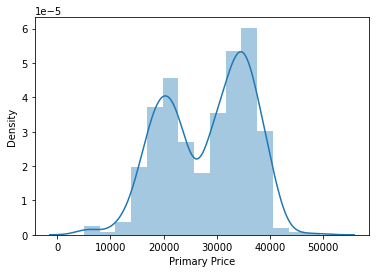

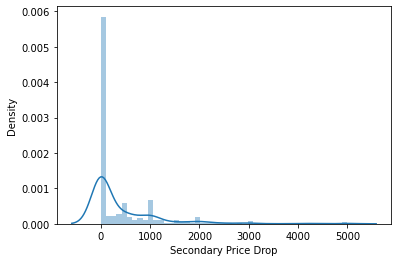

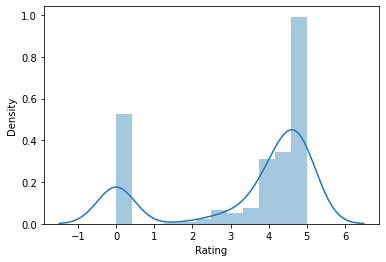

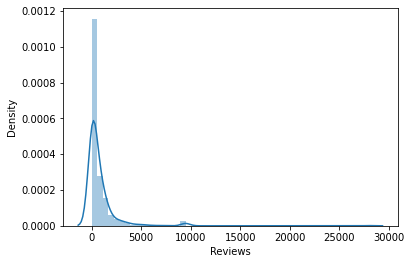

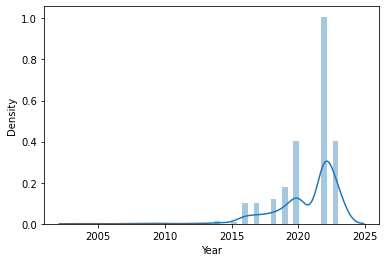

In [22]:
for x in [df['Primary Price'],df['Secondary Price Drop'],df['Rating'],df['Reviews'],df['Year']]:
    plt.figure()             
    sns.distplot(x)
plt.show()
# The below graphs are histograms for 'Primary Price', 'Secondary Price Drop', 'Rating','Reviews' and 'Year'
# The below graphs show the frequency of metrics.
# These graphs show the distribution or spread of the numerical data
# For Primary Price the data is spread between 4999 - 49430 with mean of 28186.312 and Std of 8099.74
# For Secondary Price Drop the data is spread between 0 - 4995 with mean of 398.544 and Std of 744.72
# For Rating the data is spread between 0-5 with mean of 3.4 and Std of 1.88
# For Reviews the data is spread between 0-27987 with mean of 796.45 and Std of 1721.7

## Box Plot

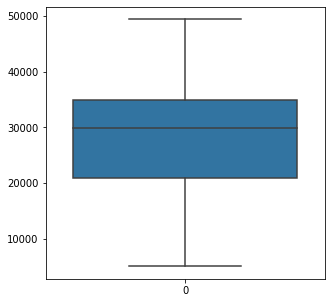

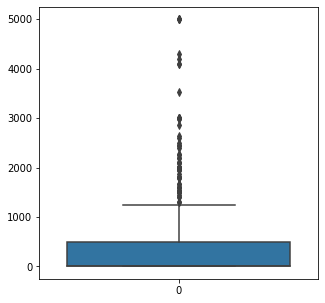

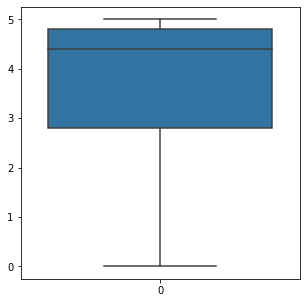

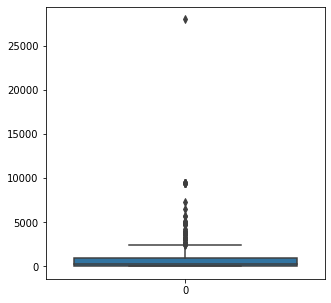

In [23]:
for x in ['Primary Price','Secondary Price Drop','Rating','Reviews']:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[x])
plt.show()
# The box plot shows the Percentiles (75%,50%,25%)of a certain metric
# For primary price the median is approximately 30000
# For Secondary Price Drop the median is approximately 0
# For Rating the median is approximately 4.5
# For Reviews the median is approximately 250

### Violin Plot

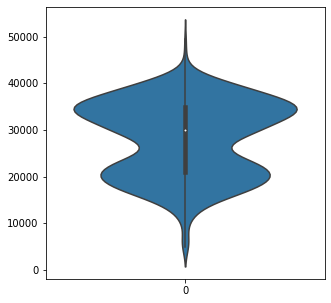

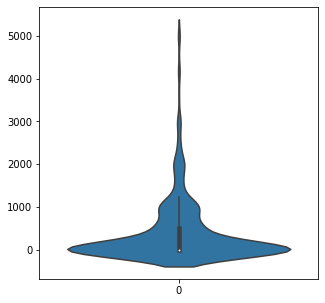

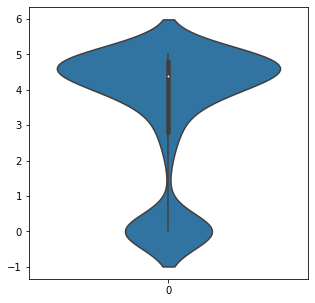

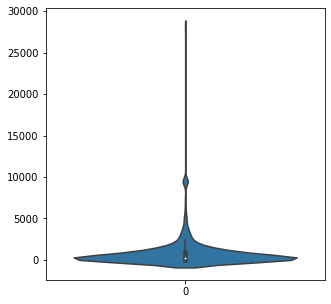

In [24]:
for x in ['Primary Price','Secondary Price Drop','Rating','Reviews']:
    plt.figure(figsize=(5,5))
    sns.violinplot(df[x])
plt.show()

# Violin plot is the same as Box plot having quartiles
# The interpretation is the same

## Categorical

### Count Plot

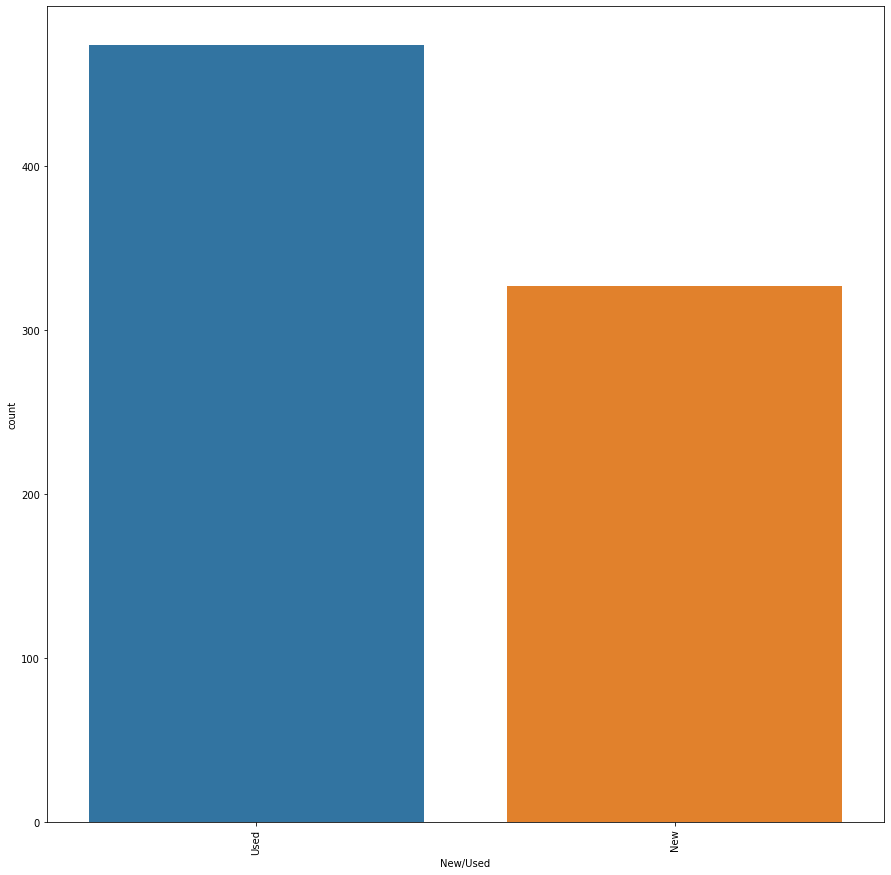

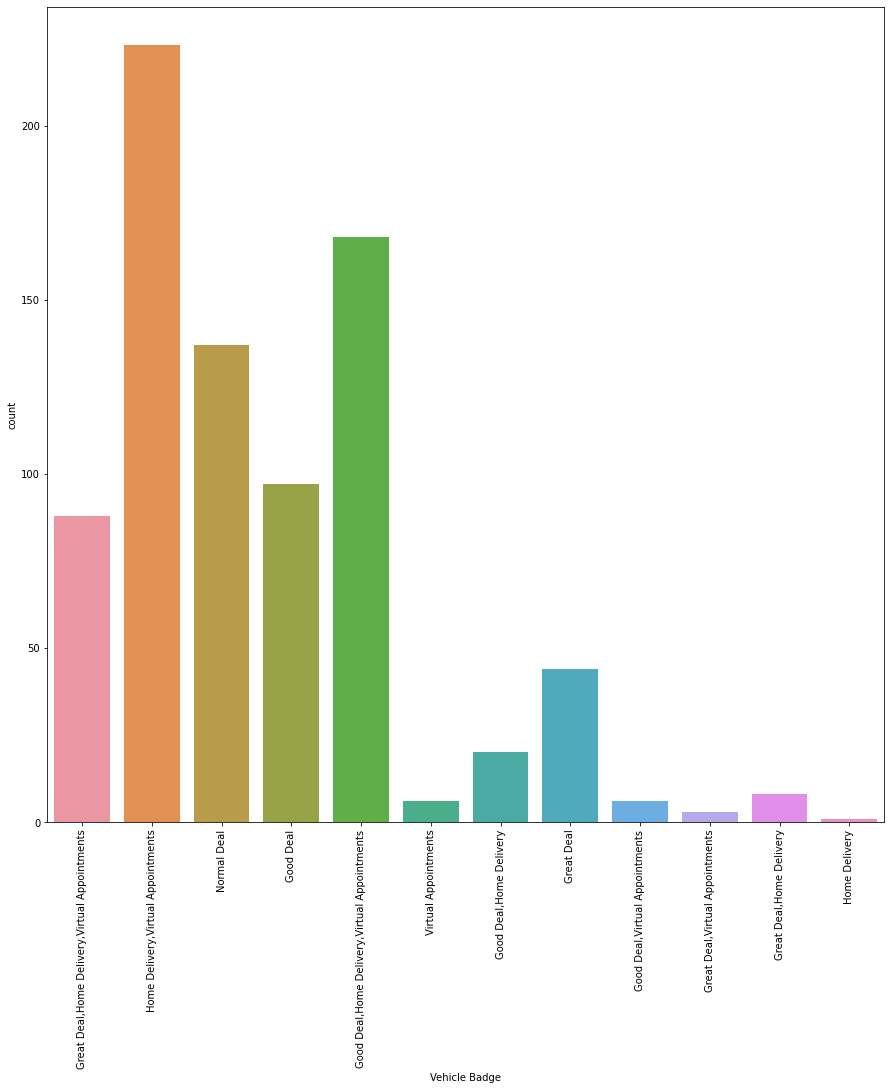

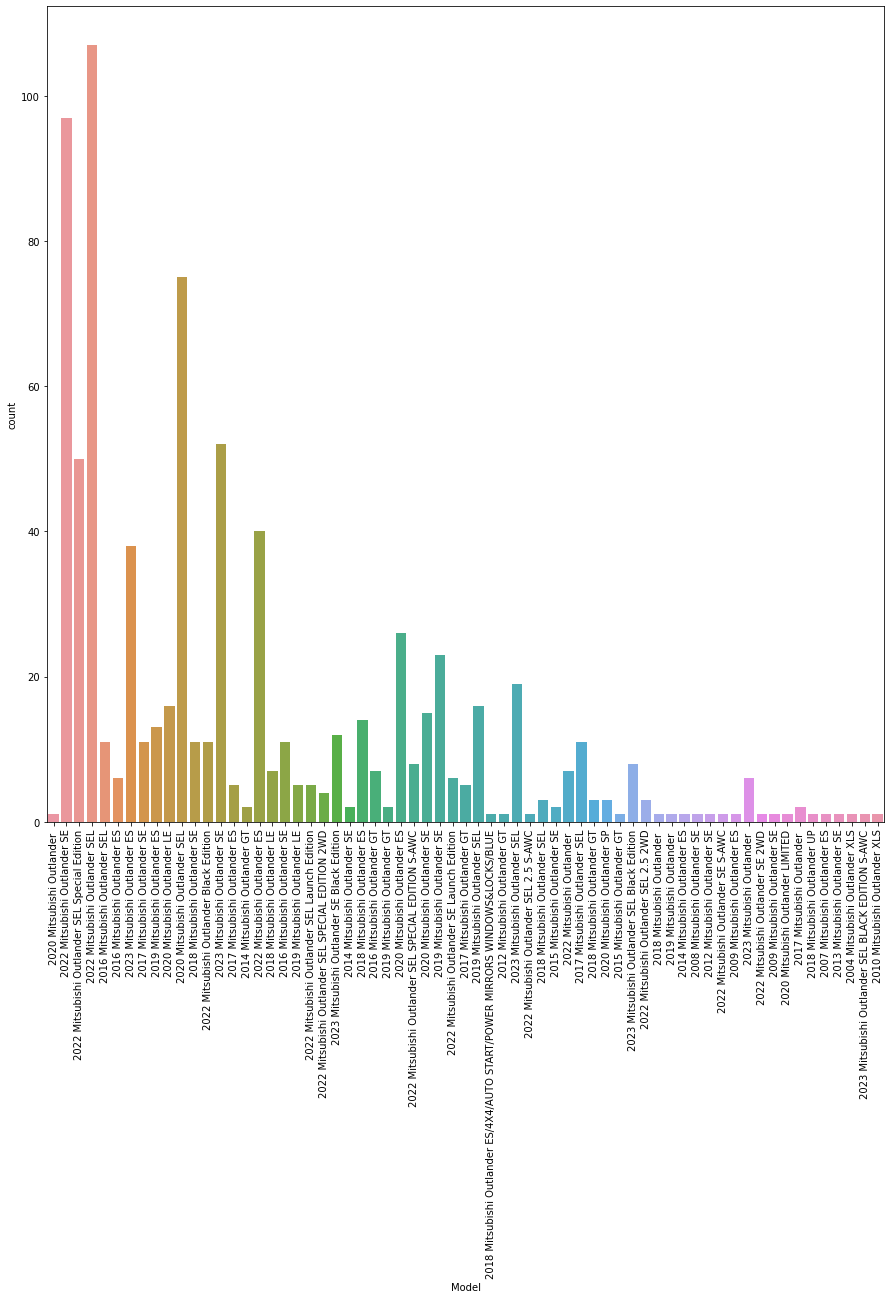

In [25]:
for i in ['New/Used','Vehicle Badge','Model']:
    plt.figure(figsize=(15,15))
    sns.countplot(data=df,x=i)
    plt.xticks(rotation=90)
plt.show()
# The count plot gives the count of the categorical values or similar to histogram
# In the New/Used Category the New vehicles are approximately 320 and Used are approximately more than 400
# In vehicle Badge 'Home Delivery, Virtual Appointments' have the highest frequency whereas 'Home Delivery' has the lowest frequency
# In Models the '2022 Mitsubishi Outlander SEL' is the highest frequent model.

### Bar Plot

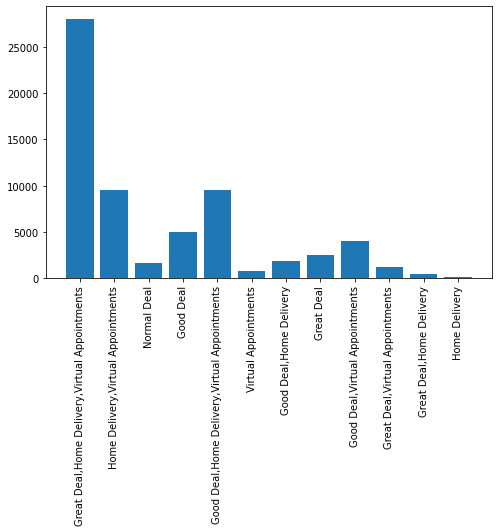

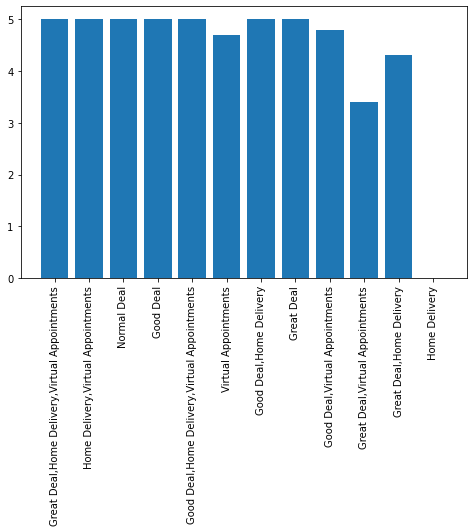

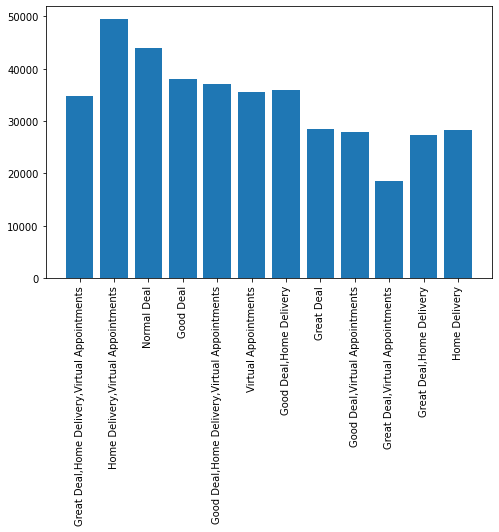

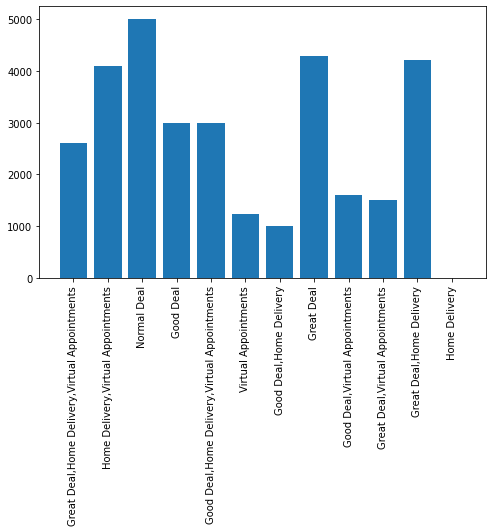

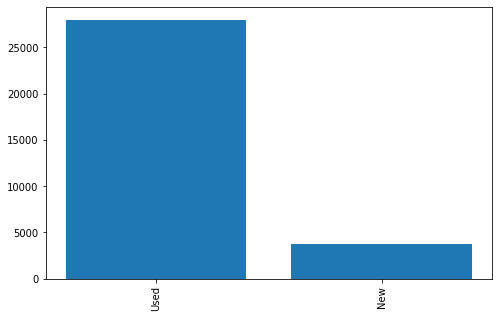

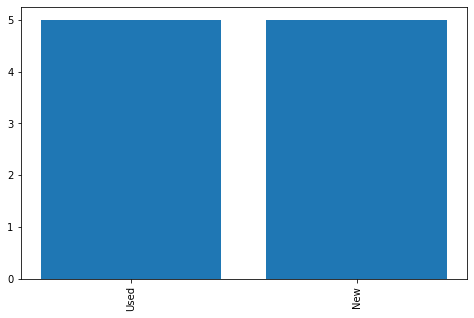

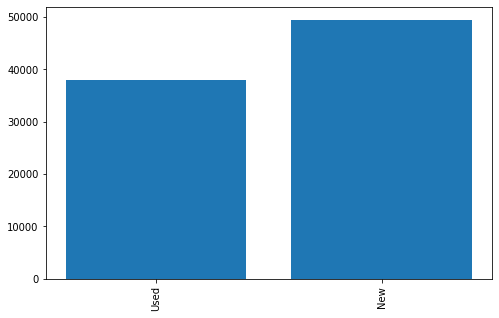

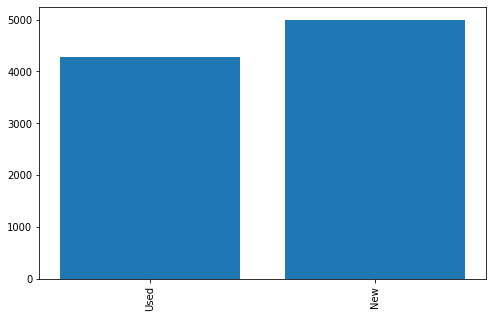

In [31]:
# Vehicle Badge vs Reviews
plt.figure(figsize=(8,5))
plt.bar(df["Vehicle Badge"],df["Reviews"])
plt.xticks(rotation=90)

# Vehicle Badge vs Rating
plt.figure(figsize=(8,5))
plt.bar(df["Vehicle Badge"],df["Rating"])
plt.xticks(rotation=90)

# Vehicle Badge vs Primary Price
plt.figure(figsize=(8,5))
plt.bar(df["Vehicle Badge"],df["Primary Price"])
plt.xticks(rotation=90)

# Vehicle Badge vs Secondary Price Drop
plt.figure(figsize=(8,5))
plt.bar(df["Vehicle Badge"],df["Secondary Price Drop"])
plt.xticks(rotation=90)

# New/Used vs Reviews
plt.figure(figsize=(8,5))
plt.bar(df["New/Used"],df["Reviews"])
plt.xticks(rotation=90)
plt.show()

# New/Used vs Ratings
plt.figure(figsize=(8,5))
plt.bar(df["New/Used"],df["Rating"])
plt.xticks(rotation=90)
plt.show()

# New/Used vs Primary Price 
plt.figure(figsize=(8,5))
plt.bar(df["New/Used"],df["Primary Price"])
plt.xticks(rotation=90)
plt.show()

# New/Used vs Secondary Price Drop
plt.figure(figsize=(8,5))
plt.bar(df["New/Used"],df["Secondary Price Drop"])
plt.xticks(rotation=90)
plt.show()

# In Vehicle Badge 'Great Deal, Home Delivery, Virtual Appointments' have the highest reviews, whereas 'Home Delivery'
# has the lowest reviews. Whereas, 'Great Deal,Virtual Appointments' have the lowest rating of approx. 3.5
# In New/Used category Used vehicle have more reviews while New vehicles have less reviews.
# In rating both seem to have almost same ratings

### Scatter Plots

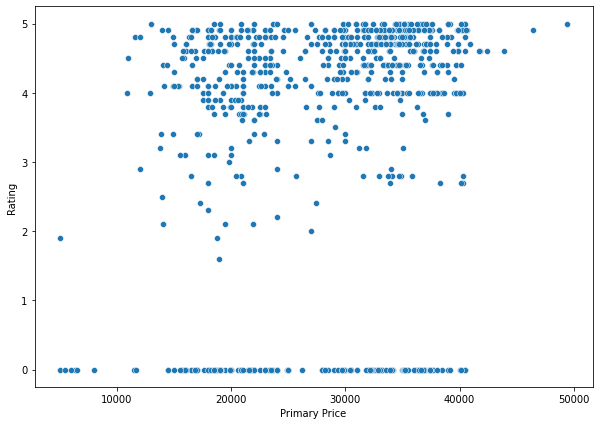

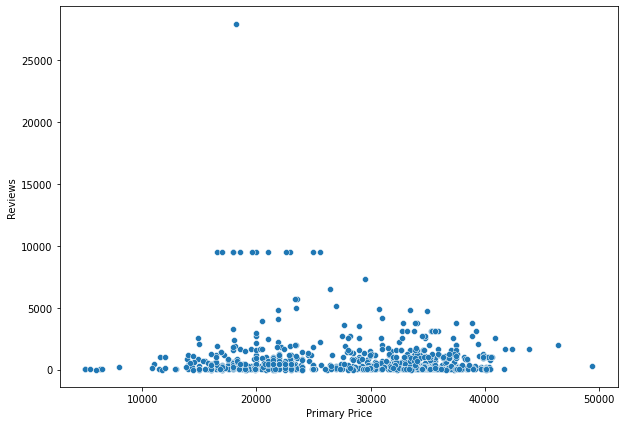

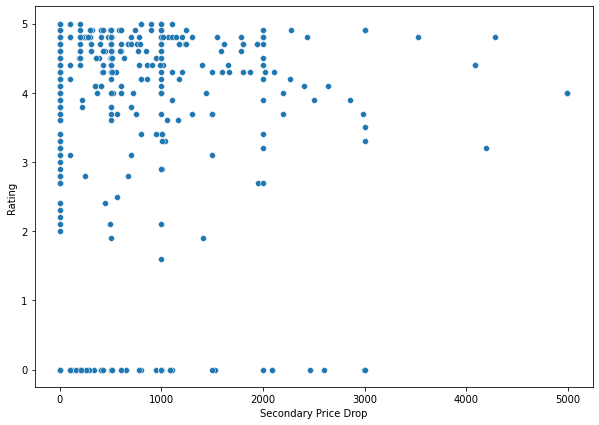

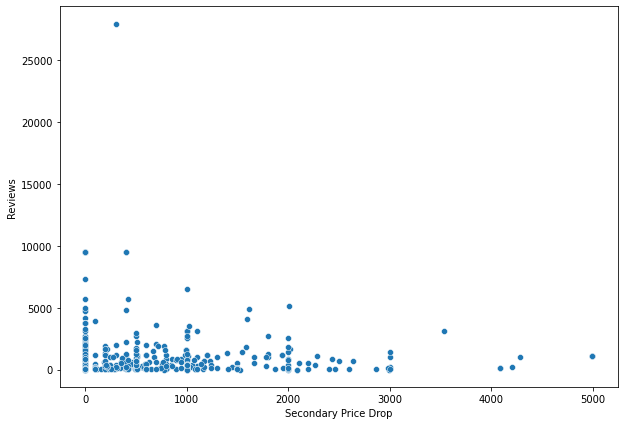

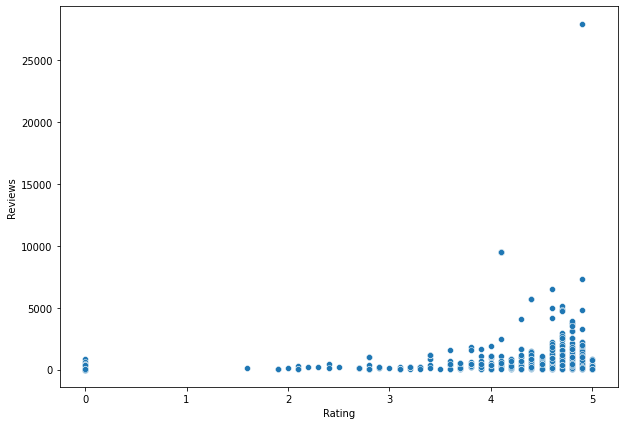

In [35]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Primary Price", y="Rating", data=df)
plt.show()

plt.figure(figsize=(10,7))
sns.scatterplot(x="Primary Price", y="Reviews", data=df)
plt.show()

plt.figure(figsize=(10,7))
sns.scatterplot(x="Secondary Price Drop", y="Rating", data=df)
plt.show()

plt.figure(figsize=(10,7))
sns.scatterplot(x="Secondary Price Drop", y="Reviews", data=df)
plt.show()

plt.figure(figsize=(10,7))
sns.scatterplot(x="Rating", y="Reviews", data=df)
plt.show()

### Pie Plot

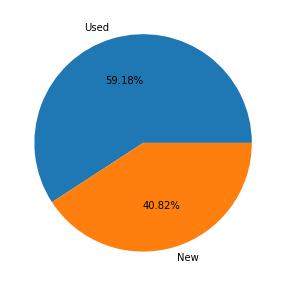

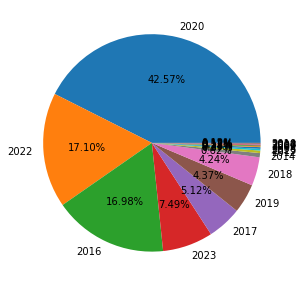

In [29]:
# New/Used
plt.figure(figsize=(5,5))
plt.pie(df['New/Used'].value_counts(),labels= df['New/Used'].unique(), autopct='%.2f%%')

# Year
plt.figure(figsize=(5,5))
plt.pie(df['Year'].value_counts(),labels= df['Year'].unique(), autopct='%.2f%%')

plt.show()

# From the pie Charts in can be interpreted that New vehicles are about 40.82% whereas Used are 59.18%
# Majority of vehicles are from 2020 and next are 2022 and 2016 and from 2023 only 7.49%

## Multivariate Analysis

### Scatter Plot

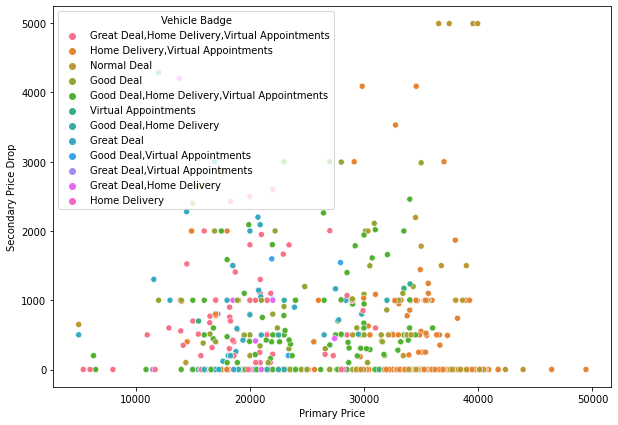

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Primary Price", y="Secondary Price Drop", data=df,hue="Vehicle Badge")
plt.show()
# The graph show the relation between Primary Price and Secondary Price Drop
# From the graph it can be inferred that major price drop in Secondary Price is in between 0-1000
# and from Primary Price between 15000-40000 having vehicle badges of 'Home Delivery', 'Good Deal', 'Good Deal, Home Delivery, Virtual Appointments' 

### Pivot Table

In [31]:
table = pd.pivot_table(data=df,index=['New/Used','Vehicle Badge','Model'])
table

Primary Price  \
New/Used Vehicle Badge                      Model                                                    
New      Home Delivery                      2022 Mitsubishi Outlander SEL             28186.312814   
         Home Delivery,Virtual Appointments 2022 Mitsubishi Outlander                 33975.000000   
                                            2022 Mitsubishi Outlander Black Edition   33312.857143   
                                            2022 Mitsubishi Outlander SE              33172.454545   
                                            2022 Mitsubishi Outlander SE 2WD          32835.000000   
...                                                                                            ...   
Used     Normal Deal                        2020 Mitsubishi Outlander ES              19995.000000   
                                            2020 Mitsubishi Outlander LE              17495.000000   
                                            2022 Mitsubishi Outlander ES              25630.000000   
                                            2022 Mitsubishi Outlander SE              34995.000000   
         Virtual Appointments               2019 Mitsubishi Outlander ES              15498.000000   

                                                                                       Rating  \
New/Used Vehicle Badge                      Model                                               
New      Home Delivery                      2022 Mitsubishi Outlander SEL            0.000000   
         Home Delivery,Virtual Appointments 2022 Mitsubishi Outlander                1.400000   
                                            2022 Mitsubishi Outlander Black Edition  4.185714   
                                            2022 Mitsubishi Outlander SE             3.368182   
                                            2022 Mitsubishi Outlander SE 2WD         4.700000   
...                                                                                       ...   
Used     Normal Deal                        2020 Mitsubishi Outlander ES             0.000000   
                                            2020 Mitsubishi Outlander LE             4.200000   
                                            2022 Mitsubishi Outlander ES             4.066667   
                                            2022 Mitsubishi Outlander SE             4.800000   
         Virtual Appointments               2019 Mitsubishi Outlander ES             3.100000   

                                                                                        Reviews  \
New/Used Vehicle Badge                      Model                                                 
New      Home Delivery                      2022 Mitsubishi Outlander SEL            136.000000   
         Home Delivery,Virtual Appointments 2022 Mitsubishi Outlander                 41.000000   
                                            2022 Mitsubishi Outlander Black Edition  889.571429   
                                            2022 Mitsubishi Outlander SE             913.181818   
                                            2022 Mitsubishi Outlander SE 2WD         204.000000   
...                                                                                         ...   
Used     Normal Deal                        2020 Mitsubishi Outlander ES              48.000000   
                                            2020 Mitsubishi Outlander LE             884.000000   
                                            2022 Mitsubishi Outlander ES             954.333333   
                                            2022 Mitsubishi Outlander SE              69.000000   
         Virtual Appointments               2019 Mitsubishi Outlander ES              45.000000   

                                                                                     Secondary Price  \
New/Used Vehicle Badge                      Model                                                      


In [32]:
df.corr()
# The below table shows the correlation between the numerical columns 
# With correlation between Primary Price and Secondary price showing highest Positive correlation, whereas
# Primary Price and Secondary Price Drop having highest Negative correlation

,Primary Price,Secondary Price Drop,Rating,Reviews,Year,Secondary Price
Primary Price,1.000000,-0.130413,0.185997,-0.064583,0.835266,0.995778
Secondary Price Drop,-0.130413,1.000000,0.059219,0.015332,-0.047641,-0.038972
Rating,0.185997,0.059219,1.000000,0.256490,0.222011,0.193700
Reviews,-0.064583,0.015332,0.256490,1.000000,-0.072645,-0.063626
Year,0.835266,-0.047641,0.222011,-0.072645,1.000000,0.840057
Secondary Price,0.995778,-0.038972,0.193700,-0.063626,0.840057,1.000000


### Heat map

<AxesSubplot:>

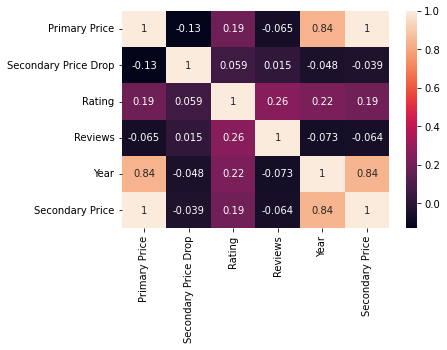

In [33]:
sns.heatmap(df.corr(),annot=True)
# The heat map shows the correlation of above table

### Swarm Plot

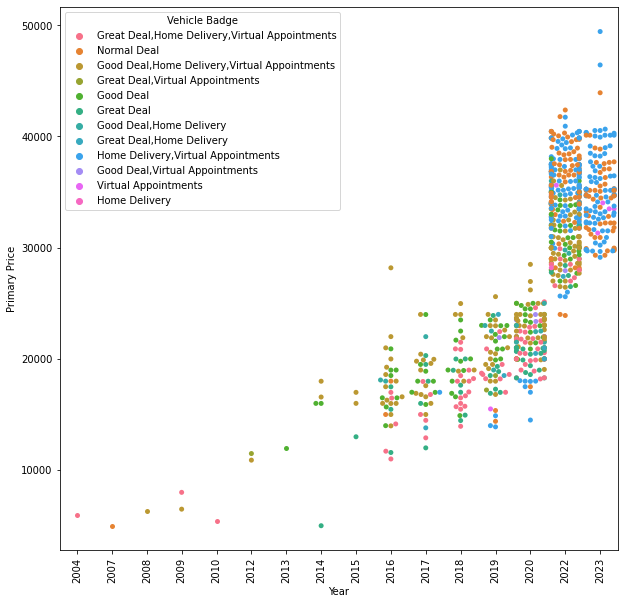

In [34]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="Year",y="Primary Price",data=df,hue="Vehicle Badge")
plt.xticks(rotation=90)
plt.show()
# This swarm Plot is a plot between Primary Price & Year with respect to Vehicle Badge.
# It can be observed that there are dense Vehicle Badge data points in 2022 when compared to other years
# whereas in other years and can also be seen that the variation in Primary Price is also the highest in 2022.
# The same is lowest before 2016. Also we can see that Primary Price has been increasing year by year

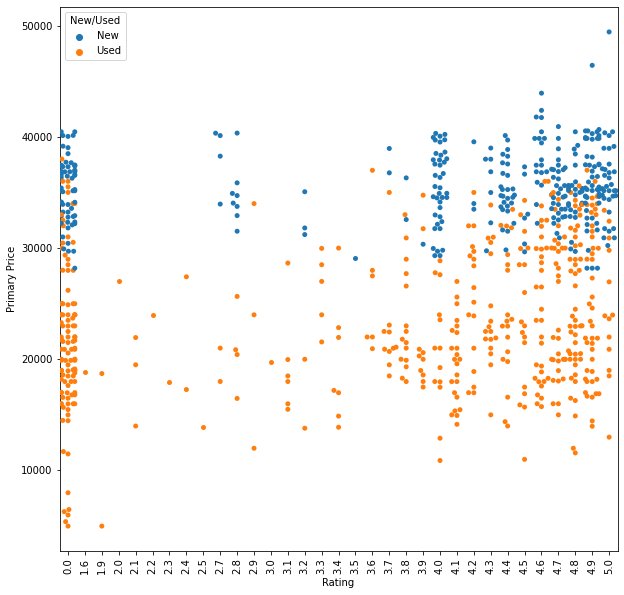

In [35]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="Rating",y="Primary Price",data=df,hue="New/Used")
plt.xticks(rotation=90)
plt.show()
# This swarm Plot is a plot between Rating & Primary Price with respect to New/Used.
# It can be observed that most of the vehicles have 0 rating which either means no rating given or 0 rating
# Also most of the ratings above 3.6 are having Primary Price more than 10000 and less than 50000 

### Strip Plot

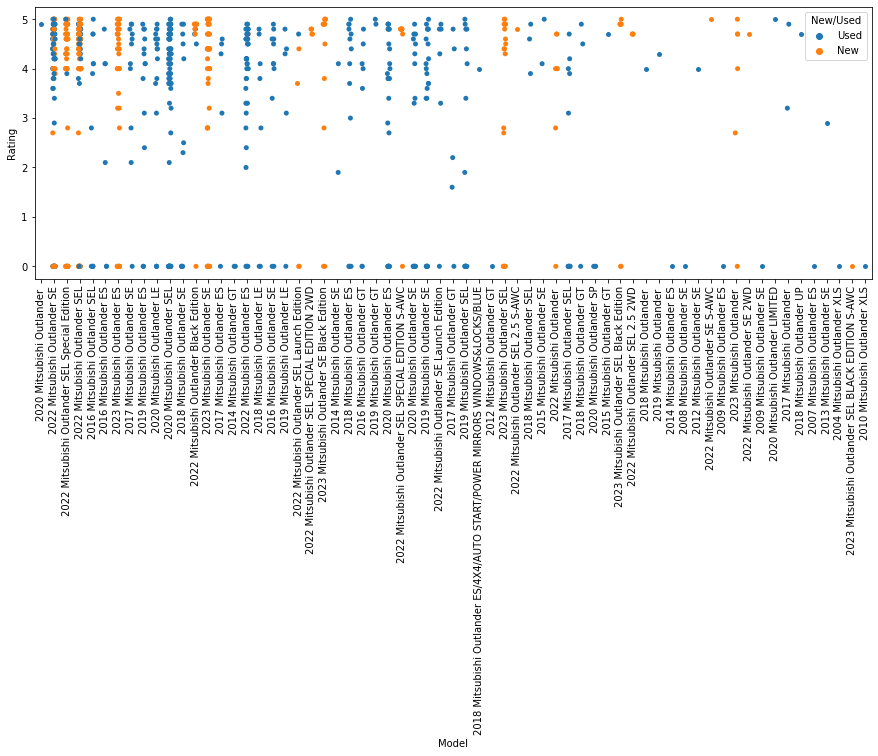

In [36]:
plt.figure(figsize=(15,5))
sns.stripplot(x="Model",y="Rating",hue="New/Used",data=df)
plt.xticks(rotation=90)
plt.show()
# This strip plot shows each models rating based on New/Used
# based on the density between 4-5 we can assume that these models have performed well
# The models are '2022 Mistubishi Outlander SE','2022 Mistubishi Outlander SEL Special Edition','2022 Mistubishi Outlander SEL'
# '2020 Mitsubishi Outlander SEL'

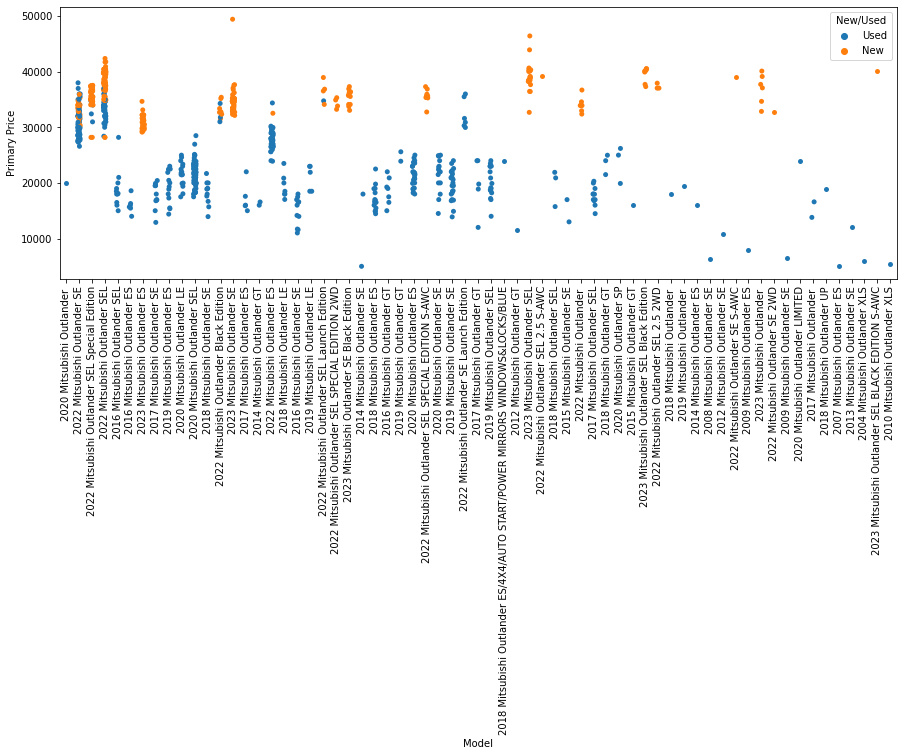

In [37]:
plt.figure(figsize=(15,5))
sns.stripplot(x="Model",y="Primary Price",hue="New/Used",data=df)
plt.xticks(rotation=90)
plt.show()
# This strip plot shows each models Primary Price based on New/Used
# We can see that everyone of the New Models are more that 25000 approx.
# Used models are also priced more than New ones for some.

### Bar Plot

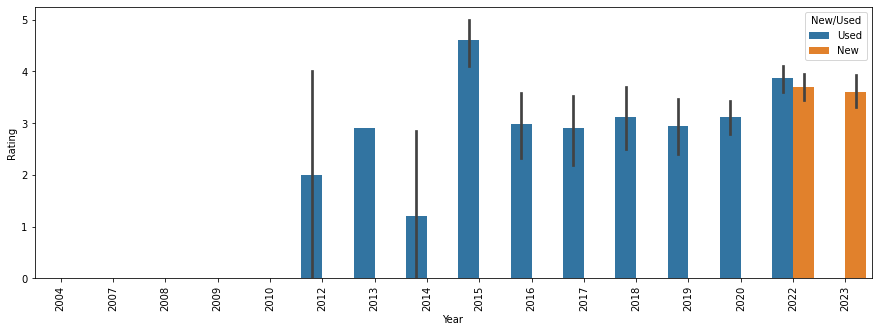

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x="Year",y="Rating",hue="New/Used",data=df)
plt.xticks(rotation=90)
plt.show()
# This Bar plot shows the Rating of New/Used vehicles based on Year.
# From this graph it can be inferred that 2015 Used vehicles have the heighest rating whereas 2014 Used Vehicles are
# lowest rating

### Scatter for Rating, Reviews and New/Used column

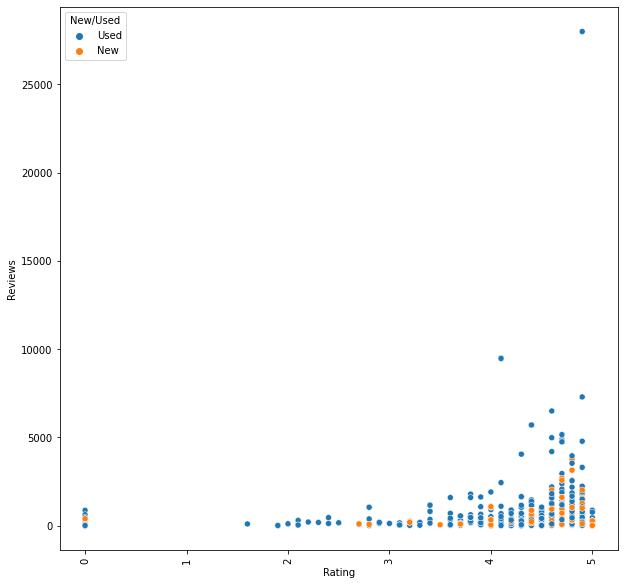

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Rating",y="Reviews",hue="New/Used",data=df)
plt.xticks(rotation=90)
plt.show()
# This Scatter plot shows the relation between Ratings and Reviews with respect to New/Used vehicles
# As can be seen that there is less correlation between the Ratings and Reviews of 0.26

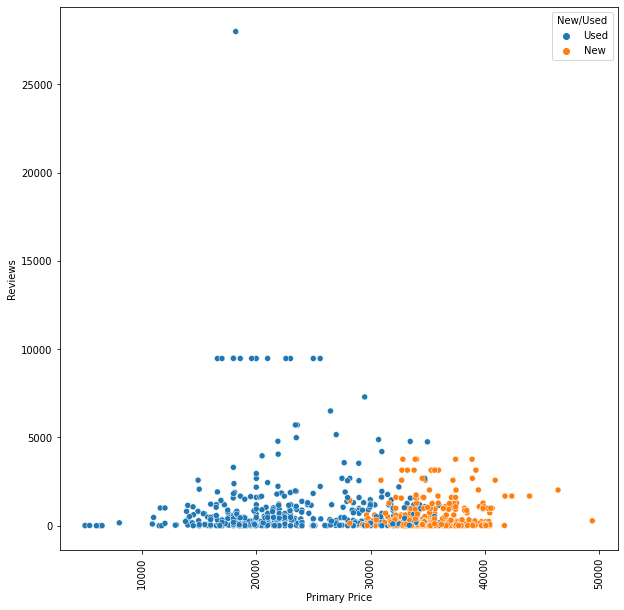

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Primary Price",y="Reviews",hue="New/Used",data=df)
plt.xticks(rotation=90)
plt.show()
# This Scatter plot shows the relation between Primary Price and Reviews with respect to New/Used vehicles
# As can be seen that there are less reviews for New vehicles and also Reviews for Used vehicles are more
# and have a great range between 0-10000 and between primary 0-35000

### Pair Plot

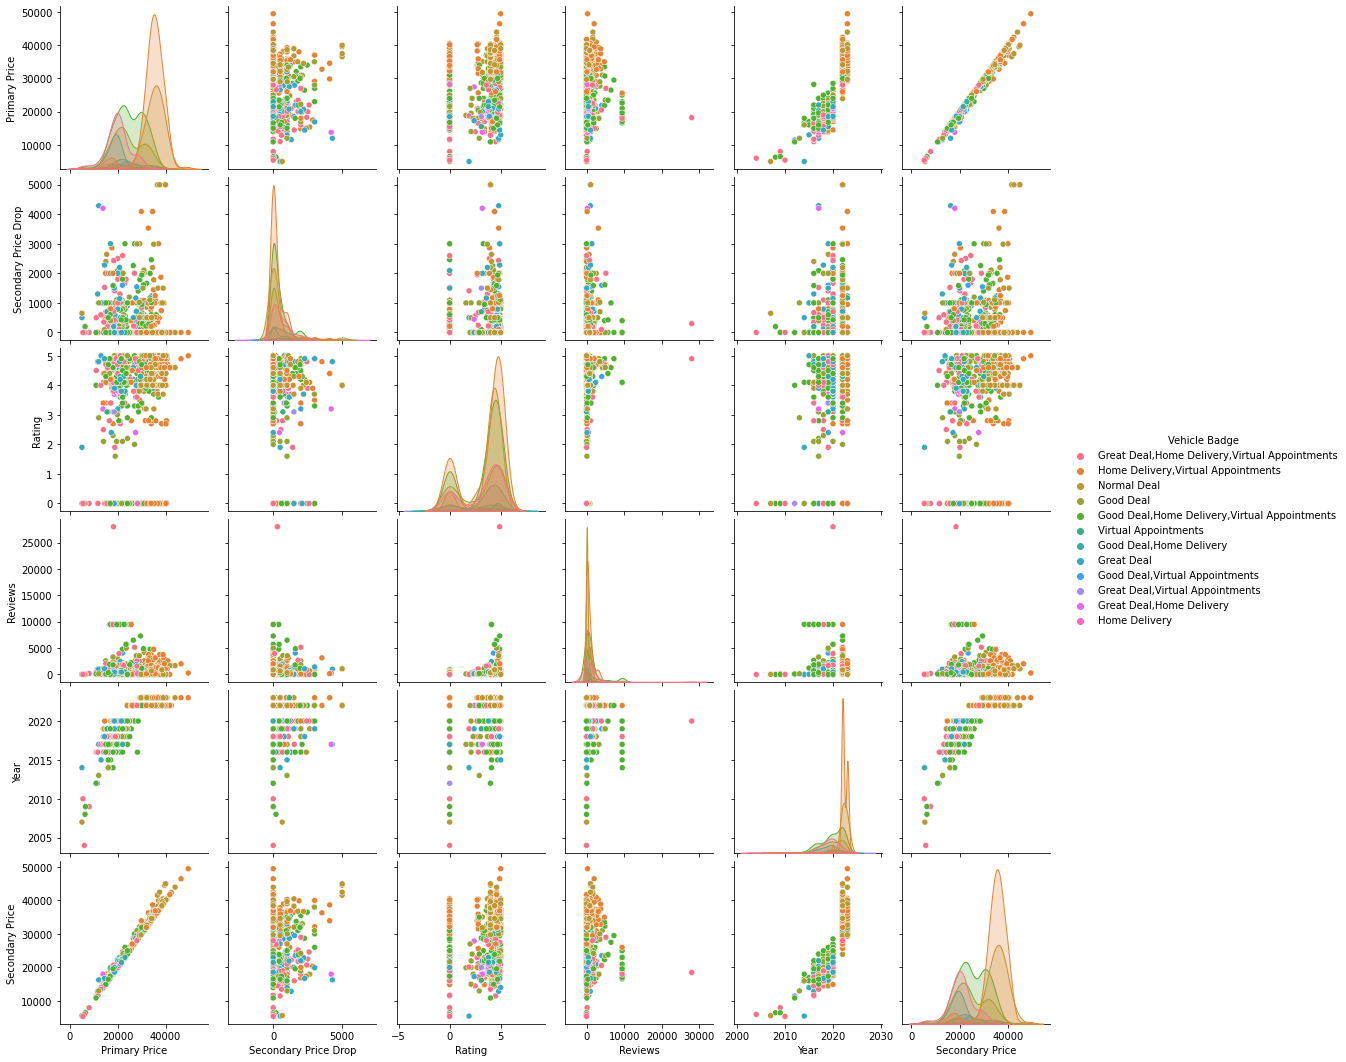

In [41]:
sns.pairplot(df,hue="Vehicle Badge")
plt.show()
# It show all pairs of numerical columns scatter plot with a hue. Here the hue is Vehicle Badge 

### Conclusion

The conclusion I have drawn from these plots are that Primary Price has a good correlation with year whereas with other features it is less correlated. With other categorical features such as New/Used Primary Price is high for New and Low for Used and for Vehicle Badges Great Deal, Good Deal , Home Delivery tags combinations having more than one of the tags made their prices higher.